# Proyecto No. 1


## 1. Crear un entorno de anaconda con los paquetes que considere necesarios.


## Entorno creado con el comando

conda create --name proyecto_env python=3.11

## Las librerías necesarias fueron instaladas con los comandos

conda install matplotlib 

conda install seaborn 

conda install numpy 

conda install pandas 

conda install scikit-learn

## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación y pruebas(20 %).


In [178]:
# Importa las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [179]:
# Define el directorio de los datos a trabajar
path_data = "/Users/luistun/Maestria/Proyecto1/proyecto_data/"

In [180]:
# Carga el archivo
datos = np.load(path_data + 'proyecto_training_data.npy')

In [181]:
# Visualiza los datos
datos

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [182]:
# Obtener la dimensión de datos
datos.shape

(1460, 6)

In [183]:
# Calcula el índice que representa el 80% de las filas
indice_80_por_ciento = int(0.8 * datos.shape[0])

In [184]:
# Divide los datos en conjuntos de entrenamiento y validación
set_de_entrenamiento = datos[:indice_80_por_ciento, :]
set_de_validacion = datos[indice_80_por_ciento:, :]

## 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):
    * media
    
    * valor máximo
    
    * valor mínimo
    
    * rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
    
    * desviación estándar

In [185]:
# Obteniendo el shape del set de entrenamiento
set_de_entrenamiento.shape

(1168, 6)

In [186]:
# Calcula la media de cada variable
medias_por_variable = np.nanmean(set_de_entrenamiento, axis=0)

In [187]:
# Visualizando medias por variable
print(f"La media de cada variable es: {medias_por_variable}")

La media de cada variable es: [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]


In [188]:
# Calcula el máximo de cada variable
maximo_por_variable = np.nanmax(set_de_entrenamiento, axis=0)

In [189]:
# Visualizando máximos por variable
print(f"El máximo de cada variable es: {maximo_por_variable}")

El máximo de cada variable es: [7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]


In [190]:
# Calcula el mínimo por variable
minimo_por_variable = np.nanmean(set_de_entrenamiento, axis=0)

In [191]:
# Visualizando mínimos por variable
print(f"El mínime de cada variable es: {minimo_por_variable}")

El mínime de cada variable es: [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]


In [192]:
# Calcula el rango de cada variable
rango_por_variable = np.nanmax(set_de_entrenamiento, axis=0) - np.nanmin(set_de_entrenamiento, axis=0)

In [193]:
# Visualizando el rango (peak to peak) por variable
print(f"El rango (peak to peak) de cada variable es: {rango_por_variable}")

El rango (peak to peak) de cada variable es: [7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]


In [194]:
# Calcula la desviación estándar de cada variable
desviacion_estandar_por_variable = np.nanstd(set_de_entrenamiento, axis=0)

In [195]:
# Visualizando la desviación estándar por variable
print(f"La desviación estándar de cada variable es: {desviacion_estandar_por_variable}")

La desviación estándar de cada variable es: [7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


## 4. Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.


In [196]:
set_de_entrenamiento.shape[1]

6

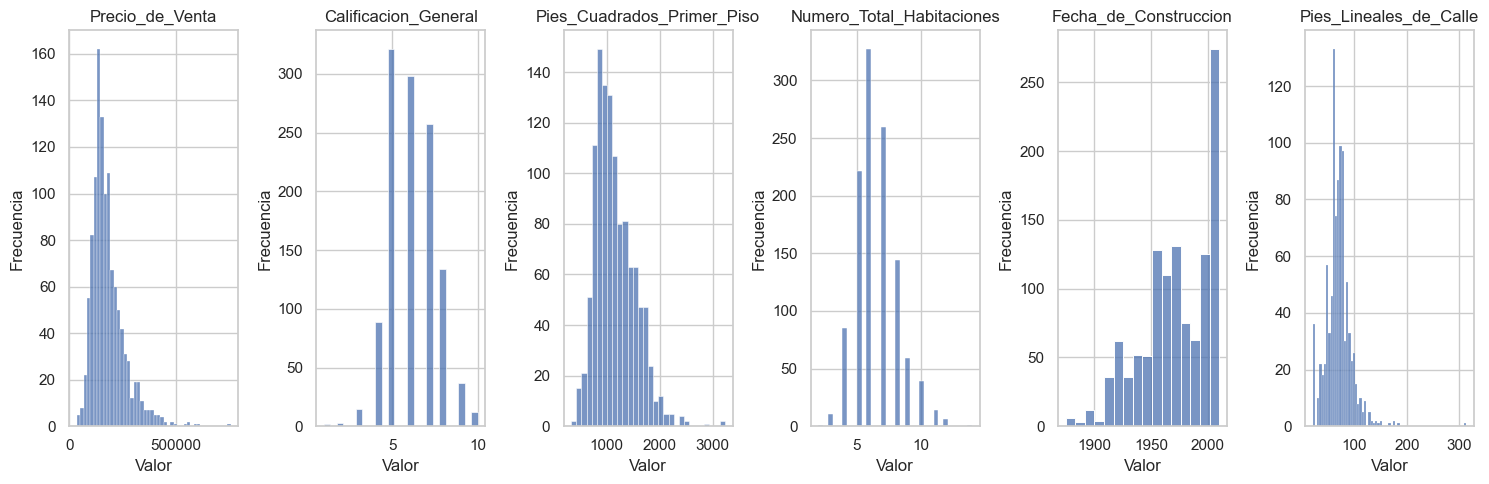

In [219]:
# Configura el estilo de las gráficas
sns.set(style="whitegrid")

# Crea subgráficas para cada variable
fig, axes = plt.subplots(nrows=1, ncols=set_de_entrenamiento.shape[1], figsize=(15, 5))

# Lista con nombre de cada variable
nombres_variables = ['Precio_de_Venta', 'Calificacion_General', 'Pies_Cuadrados_Primer_Piso', 'Numero_Total_Habitaciones', 'Fecha_de_Construccion', 'Pies_Lineales_de_Calle']

# Itera sobre cada columna (variable) del conjunto de entrenamiento
for columna, ax in enumerate(axes):
    variable_actual = set_de_entrenamiento[:, columna]
    
    # Utiliza histplot para crear un histograma de la variable actual
    sns.histplot(variable_actual, kde=False, ax=ax)
    ax.set(title=nombres_variables[columna], xlabel='Valor', ylabel='Frecuencia')

# Ajusta el diseño de las subgráficas
plt.tight_layout()

# Muestra la gráfica
#plt.show()
plt.savefig('histogramas.png', dpi=300)

## 5. Para cada variable independiente x :

    * Calcular el coeficiente de correlación entre x y y.
    * Graficar x vs y(scatterplot) usando matplotlib.
    * Colocar el coeficiente de correlación y colocarlo como parte del tı́tulo de la gráfica.
    * Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente.
    

In [198]:
# Separando la variable independiente y de las variables independientes
y = set_de_entrenamiento[:, 0]
variables_independientes = set_de_entrenamiento[:, 1:]

In [199]:
# Calcula el coeficiente de correlación entre cada variable independiente (x) y la variable dependiente (y)
coeficientes_correlacion = []
for i in range(variables_independientes.shape[1]):
    x = variables_independientes[:, i]
    
    # Filtrar NaNs de la variable independiente x
    indices_no_nan = ~np.isnan(x)
    x_no_nan = x[indices_no_nan]
    y_no_nan = y[indices_no_nan]
    
    # Calcular el coeficiente de correlación solo si hay valores no NaN
    if len(x_no_nan) > 0:
        coef_corr = np.corrcoef(x_no_nan, y_no_nan)[0, 1]
    else:
        coef_corr = np.nan
    
    coeficientes_correlacion.append(coef_corr)

In [200]:
# Muestra los coeficientes de correlación de cada variable
print(f"Los coeficientes de correlación de cada variable son: {coeficientes_correlacion}")

Los coeficientes de correlación de cada variable son: [0.7939900504626409, 0.6162887000998717, 0.5647069399593069, 0.5341706927117518, 0.3632916166538923]


In [201]:
# Encuentra los índices de las dos variables con mayor correlación
variables_top2_indices = np.argsort(np.abs(coeficientes_correlacion))[::-1][:2]

In [202]:
variables_top2_indices

array([0, 1])

In [203]:
# Muestra las dos variables con mayor correlación
variables_seleccionadas = [nombres_variables[variables_top2_indices[0]+1], nombres_variables[variables_top2_indices[1]+1]]
print(f"Las 2 variables con mayor correlación son: {variables_seleccionadas}")

Las 2 variables con mayor correlación son: ['Calificacion_General', 'Pies_Cuadrados_Primer_Piso']


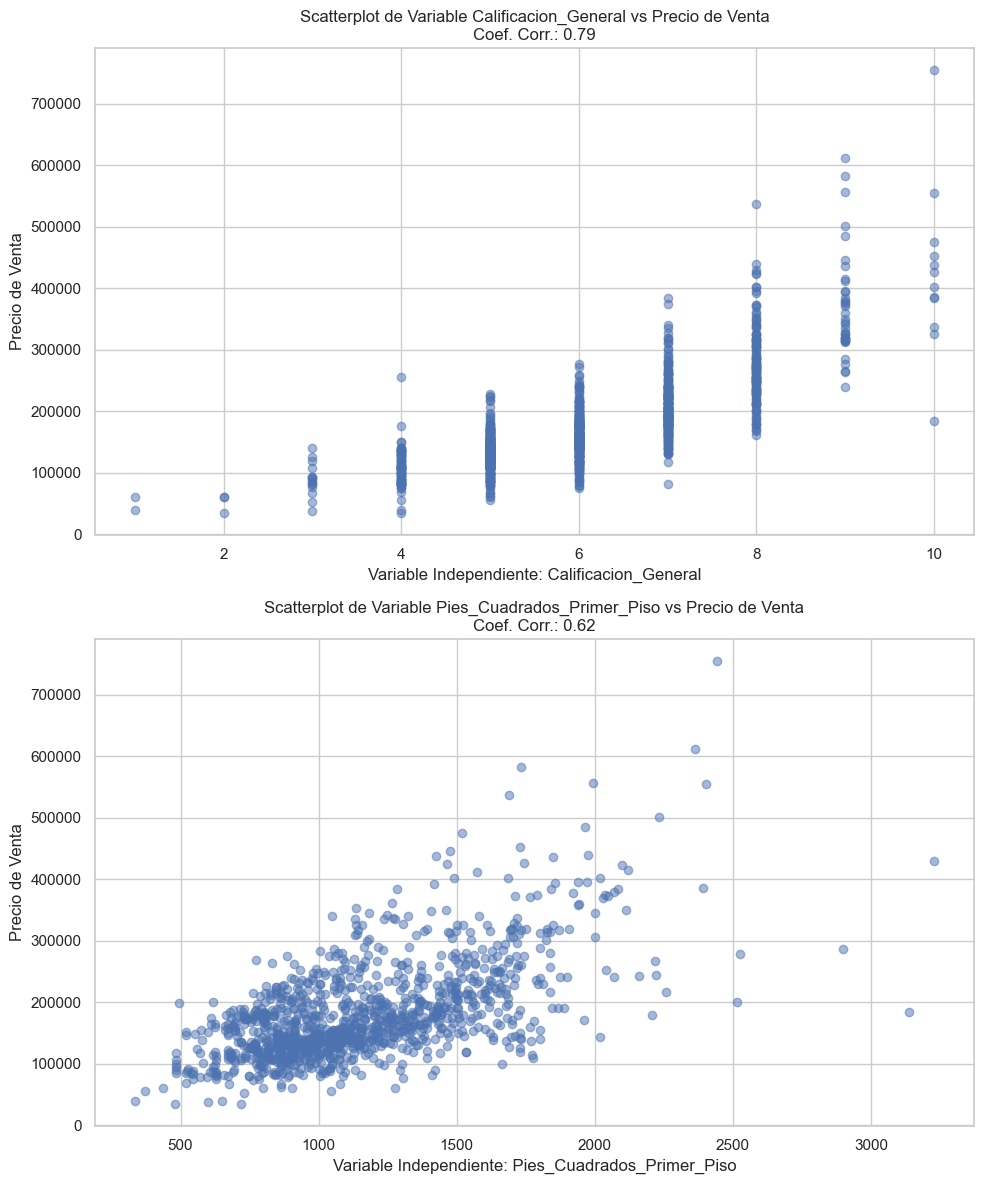

In [204]:
# Grafica x vs y (scatterplot) para las dos variables con mayor correlación
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
for i, idx in enumerate(variables_top2_indices):
    x = variables_independientes[:, idx]
    coef_corr = coeficientes_correlacion[idx]
    
    axs[i].scatter(x, y, alpha=0.5)
    axs[i].set_xlabel(f'Variable Independiente: {variables_seleccionadas[i]}')
    axs[i].set_ylabel('Precio de Venta')
    axs[i].set_title(f'Scatterplot de Variable {variables_seleccionadas[i]} vs Precio de Venta\nCoef. Corr.: {coef_corr:.2f}')

plt.tight_layout()
plt.show()

In [205]:
# Imprime las dos variables con mayor correlación y el coeficiente de correlación
print("Las dos variables con mayor correlación son:")
for idx in variables_top2_indices:
    print(f"Variable Independiente: {variables_seleccionadas[idx]}, Coef. Corr.: {coeficientes_correlacion[idx]:.2f}")

Las dos variables con mayor correlación son:
Variable Independiente: Calificacion_General, Coef. Corr.: 0.79
Variable Independiente: Pies_Cuadrados_Primer_Piso, Coef. Corr.: 0.62


## 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 + β1 ∗ x. La función recibe como argumentos:
    6.1 Vector con la variable independiente x,
    6.2 Vector con la variable dependiente y,
    6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
    6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos
    imprimir a través de print: el número de iteración, el error del modelo en esa itera-
    ción, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:
    10,20,30,40,50.
    6.5 escalar α(learning rate): es usado como parte de la expresión matemática para actualizar
    en cada iteración los parámetros del modelo.
    

In [206]:
# Clase para entrenar modelo
class RegresionLineal:
    def __init__(self):
        self.modelos = []  # Lista para almacenar los modelos de cada iteración
        self.errores = []  # Lista para almacenar los errores de cada iteración
        
    def entrenar_modelo(self, x, y, epochs, imprimir_error_cada, alpha):
        X = np.column_stack((x, np.ones_like(x)))  # Agregar columna de unos para intercepto
        n = len(y)
        beta = np.zeros(2)  # Inicializar parámetros del modelo

        for epoch in range(epochs):
            # Calcular ŷ (predicción)
            y_pred = np.dot(X, beta)

            # Calcular error
            error = np.mean((y_pred - y) ** 2) / 2
            self.errores.append(error)

            # Calcular gradiente del error
            gradiente = np.dot(X.T, (y_pred - y)) / n

            # Actualizar parámetros del modelo
            beta -= alpha * gradiente

            # Almacenar modelo resultante
            self.modelos.append(beta)

            # Imprimir error cada imprimir_error_cada iteraciones
            if (epoch + 1) % imprimir_error_cada == 0:
                print(f"Iteración {epoch + 1}: Error = {error:.4f}")

    def graficar_curva_aprendizaje(self):
        plt.plot(range(len(self.errores)), self.errores, marker='o')
        plt.xlabel('Iteración')
        plt.ylabel('Error')
        plt.title('Curva de Aprendizaje')
        plt.show()

    def graficar_modelo_evolutivo(self, x, y, n):
        for i in range(0, len(self.modelos), n):
            beta = self.modelos[i]
            y_pred = beta[0] * x + beta[1]
            plt.plot(x, y_pred, label=f'Iteración {i+1}')

        plt.scatter(x, y, color='red', label='Datos de Entrenamiento')
        plt.xlabel('Variable Independiente')
        plt.ylabel('Variable Dependiente')
        plt.title('Evolución del Modelo')
        plt.legend()
        plt.show()

    def entrenar_modelo_sklearn(self, x, y):
        modelo_sklearn = LinearRegression()
        modelo_sklearn.fit(x.reshape(-1, 1), y)
        return modelo_sklearn

    def hacer_predicciones(self, x, modelo_manual, modelo_sklearn):
        prediccion_manual = np.dot(np.column_stack((x, np.ones_like(x))), modelo_manual)
        prediccion_sklearn = modelo_sklearn.predict(x.reshape(-1, 1))
        prediccion_combinada = (prediccion_manual + prediccion_sklearn) / 2
        return prediccion_manual, prediccion_sklearn, prediccion_combinada
    
    def comparar_errores_modelos(self, x, y, modelo_manual, modelo_sklearn):
        # Calcular errores para cada modelo
        error_manual = np.mean((np.dot(np.column_stack((x, np.ones_like(x))), modelo_manual) - y) ** 2)
        error_sklearn = np.mean((modelo_sklearn.predict(x.reshape(-1, 1)) - y) ** 2)
        prediccion_manual, prediccion_sklearn, _ = self.hacer_predicciones(x, modelo_manual, modelo_sklearn)
        error_combinado = np.mean(((prediccion_manual + prediccion_sklearn) / 2 - y) ** 2)
        
        # Almacenar errores en una lista
        errores_por_modelo = [error_manual, error_sklearn, error_combinado]
        
        # Graficar los errores de cada modelo
        plt.bar(['Manual', 'Scikit-Learn', 'Combinado'], errores_por_modelo)
        plt.xlabel('Modelo')
        plt.ylabel('Error')
        plt.title('Errores de los Modelos')
        # Agregar texto encima de cada barra
        for i, error in enumerate(errores_por_modelo):
            plt.text(i, error + 0.01, f'{error:.4f}', ha='center', va='bottom')
        plt.show()

In [207]:
# Creando los arrays de cada variable seleccionada anteriormente
Calificacion_General = variables_independientes[:,0]
Pies_Cuadrados_Primer_Piso = variables_independientes[:,1]

In [208]:
Pies_Cuadrados_Primer_Piso

array([ 856., 1262.,  920., ..., 1502., 1694.,  959.])

In [209]:
Calificacion_General

array([7., 6., 7., ..., 7., 8., 6.])

## Entrenando el modelo para la variable Pies_Cuadrados_Primer_Piso


Iteración 10: Error = 1968121172.4194
Iteración 20: Error = 1968092930.4871
Iteración 30: Error = 1968092848.3026
Iteración 40: Error = 1968092766.1285
Iteración 50: Error = 1968092683.9547
Iteración 60: Error = 1968092601.7810
Iteración 70: Error = 1968092519.6074
Iteración 80: Error = 1968092437.4340
Iteración 90: Error = 1968092355.2608
Iteración 100: Error = 1968092273.0877


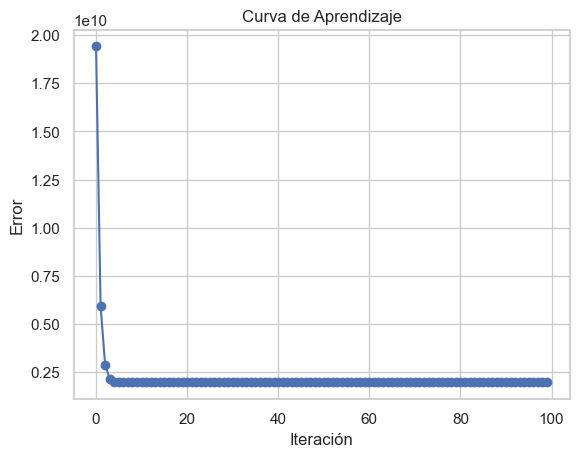

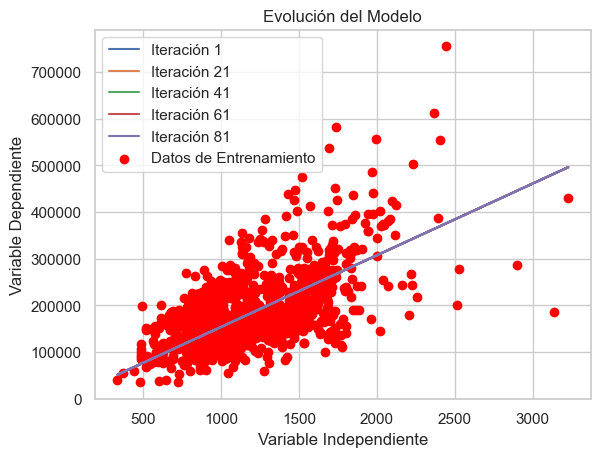

In [210]:
# Iniciar la función para la variable Pies_Cuadrados_Primer_Piso
modelo1 = RegresionLineal()
modelo1.entrenar_modelo(Pies_Cuadrados_Primer_Piso, y, epochs=100, imprimir_error_cada=10, alpha=0.000001)
modelo1.graficar_curva_aprendizaje()
modelo1.graficar_modelo_evolutivo(Pies_Cuadrados_Primer_Piso, y, n=20)

## Entrenando el modelo para la variable Calificacion_General


Iteración 1000: Error = 1243133294.5914
Iteración 2000: Error = 1184232714.1805
Iteración 3000: Error = 1161388918.5757
Iteración 4000: Error = 1152529260.5894
Iteración 5000: Error = 1149093161.7470
Iteración 6000: Error = 1147760517.1603
Iteración 7000: Error = 1147243668.9334
Iteración 8000: Error = 1147043216.3203
Iteración 9000: Error = 1146965473.4782
Iteración 10000: Error = 1146935321.9656


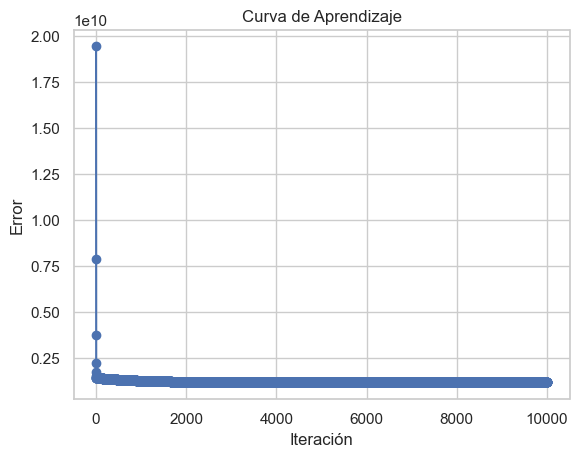

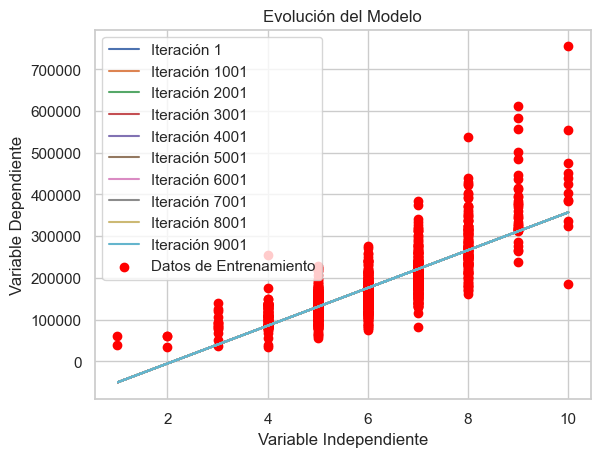

In [211]:
# Iniciar la función para la variable Calificacion_General
modelo2 = RegresionLineal()
modelo2.entrenar_modelo(Calificacion_General, y, epochs=10000, imprimir_error_cada=1000, alpha=0.01)
modelo2.graficar_curva_aprendizaje()
modelo2.graficar_modelo_evolutivo(Calificacion_General, y, n=1000)

## Compararndo modelo de regresión lineal entrenado manualmente y el modelo de scikit-learn


### Definiendo las variables independientes de validación


In [212]:
y_validacion = set_de_validacion[:, 0]
variables_independientes_validacion = set_de_validacion[:, 1:]
Calificacion_General_Validacion = variables_independientes_validacion[:,0]
Pies_Cuadrados_Primer_Piso_Validacion = variables_independientes_validacion[:,1]

### Para la variable Pies_Cuadrados_Primer_Piso


In [213]:
modelo_sklearn = modelo1.entrenar_modelo_sklearn(Pies_Cuadrados_Primer_Piso_Validacion, y_validacion)
pred_manual, pred_sklearn, pred_combinada = modelo1.hacer_predicciones(Pies_Cuadrados_Primer_Piso_Validacion, modelo1.modelos[-1], modelo_sklearn)

In [214]:
print("Predicción con modelo entrenado manualmente:", pred_manual)
print("Predicción con modelo de scikit-learn:", pred_sklearn)
print("Predicción combinada:", pred_combinada)

Predicción con modelo entrenado manualmente: [189969.70137088 281419.32122745 171833.47423966 193812.12237325
  96060.93207278 251448.43740891 179825.7099246  327220.97957579
 141862.59042112 125724.42221113 126031.81589132 172755.65528023
 199498.90545677 253907.58685043 370563.4884826  173677.8363208
 241611.83964282 145858.70826359 155849.00286977 249604.07532777
 127722.48113237 158000.7586311  249296.68164758 117424.792846
 129413.14637341 188125.33928974 101901.41199639 111891.70660257
 135099.92945693 125263.33169085 186280.97720859 212409.44002476
 132794.47685551 133101.8705357  135868.41365741 250526.25636834
 165070.81327547 337518.66786216 162304.27015376 261285.035175
 197193.45285535 255137.16157119 162150.57331367 165992.99431604
 103284.68355725 147549.37350463 153543.55026834 137405.38205836
 202572.84225867 201958.05489829 103284.68355725 103284.68355725
 140171.92518007 186127.2803685  179518.31624441 328296.85745645
 121113.51700828 174907.41104156 137405.38205836 1

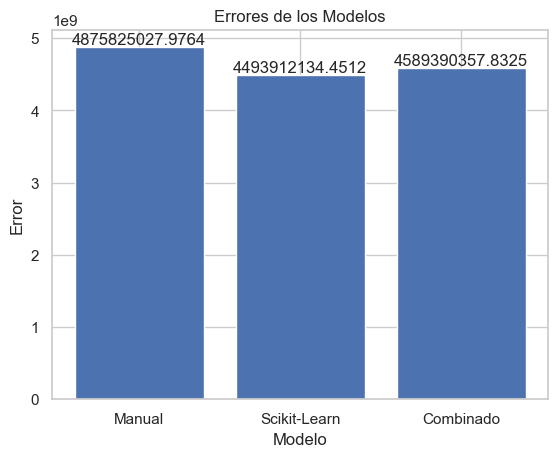

In [215]:
## Graficando el error de cada modelo para la variable 
modelo1.comparar_errores_modelos(Pies_Cuadrados_Primer_Piso_Validacion, y_validacion, modelo1.modelos[-1], modelo_sklearn )

### Para la variable Calificacion_General


In [216]:
modelo_sklearn = modelo2.entrenar_modelo_sklearn(Calificacion_General_Validacion, y_validacion)
pred_manual, pred_sklearn, pred_combinada = modelo2.hacer_predicciones(Calificacion_General_Validacion, modelo1.modelos[-1], modelo_sklearn)

In [217]:
print("Predicción con modelo entrenado manualmente:", pred_manual)
print("Predicción con modelo de scikit-learn:", pred_sklearn)
print("Predicción combinada:", pred_combinada)

Predicción con modelo entrenado manualmente: [ 922.58805392 1537.3754143   922.58805392  922.58805392 1076.28489402
  768.89121383  922.58805392 1229.98173411  768.89121383  922.58805392
  768.89121383  768.89121383 1076.28489402 1229.98173411 1537.3754143
  768.89121383  768.89121383  768.89121383  461.49753364 1229.98173411
 1076.28489402 1076.28489402  615.19437373 1229.98173411  768.89121383
  922.58805392  922.58805392  922.58805392 1076.28489402 1076.28489402
 1076.28489402  615.19437373  615.19437373 1076.28489402  768.89121383
 1076.28489402  768.89121383 1076.28489402  615.19437373  922.58805392
  768.89121383 1229.98173411  922.58805392 1229.98173411  615.19437373
  615.19437373  768.89121383  768.89121383  922.58805392 1229.98173411
  615.19437373  922.58805392  768.89121383  768.89121383  922.58805392
  768.89121383 1076.28489402  922.58805392  922.58805392  768.89121383
 1383.67857421  768.89121383  768.89121383  768.89121383  615.19437373
  768.89121383  768.89121383  768

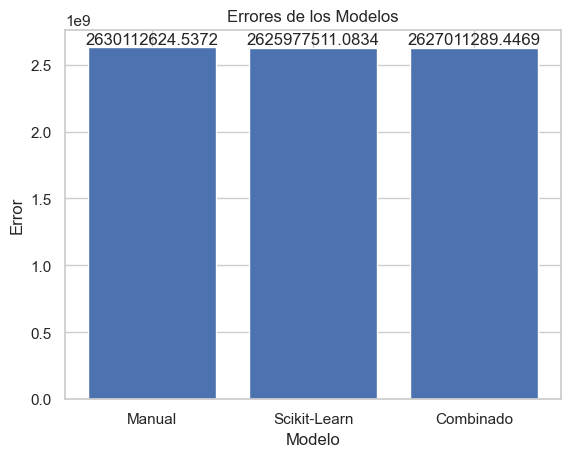

In [218]:
## Graficando el error de cada modelo para la variable 
modelo2.comparar_errores_modelos(Calificacion_General_Validacion, y_validacion, modelo2.modelos[-1], modelo_sklearn )

## Conclusión

    * Según la gráfica comparativa entre los errores de cada modelo para el caso de la variable Pies_Cuadrados_Primer_Piso el error es más pequeño para el modelo de skcit-learn, por tanto, se este es el modelo más adecuado para esta variable.
    * Para el caso de la variable Calificacion_General el error es tabmién más pequeño para el modelo de skcit-learn, sin embargo, el error no es apreciablemente diferente, por lo que para esta variable cualquier modelo es adecuado.